## Simulation 3 Qubits

We expect to achieve the following:

1. Time-independent Unitary-Evolution
2. Non-unitary evolution with constant collapsing operator
3. Time-dependent hamiltonian evolution with constant collapsing operator
4. Non-unitary evolution with time-dependent collapsing operators
5. Time-dependent evolution with bath interaction

In [1]:
import qutip.testing as qt
#qt.run()

In [2]:
from qutip import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt


## 0. Hamiltonian

Consider the general trancated hamiltonian of a 3-qubit system with coupling of the form:

$H_{{\rm trun}}=\frac{1}{2}\sum_{\alpha}\omega_{\alpha}\sigma_{z,\alpha}+\sum_{\alpha<\beta}g_{\alpha\beta}\sigma_{i_{\alpha},\alpha}\sigma_{j_{\beta},\beta} $


where $i_{\alpha},j_{\beta}\in\{x,y,z\}$. Our first apporach will consist in simulate this system in abscense of noise, also due to the common use of the coupling $xx$ and $zz$ then we will consider that $i_{\alpha}=j_{\beta}$. Under these conditions our hamiltonian takes the form:

$H_{1,{\rm trun}}=\frac{1}{2}\sum_{\alpha}\omega_{\alpha}\sigma_{z,\alpha}+\sum_{\alpha<\beta}g_{\alpha\beta}\sigma_{i,\alpha}\sigma_{i,\beta} $

we had set $\hbar=1$ in our modelling.

## 1. Time-independent Unitary-Evolution

In [4]:
omega=[1,2,3]  #Set of frequencies of each qubit
coupling_constants=[0.1,0.4,0.8]   #12, 23, 31

H1=(1/2)*omega[0]*tensor(sigmaz(), identity(2), identity(2))
H2=(1/2)*omega[0]*tensor(identity(2),sigmaz(), identity(2))
H3=(1/2)*omega[0]*tensor(identity(2),identity(2),sigmaz())


def Matrix_Pauli(Latindex):
    if Latindex=='x' or Latindex==1:
        return sigmax()
    elif Latindex=='y' or Latindex==2:
        return sigmay()
    elif Latindex=='z' or Latindex==3:
        return sigmaz()

Latin_index=1


H12=coupling_constants[0]*tensor(Matrix_Pauli(Latin_index),Matrix_Pauli(Latin_index), identity(2))
H23=coupling_constants[1]*tensor(identity(2),Matrix_Pauli(Latin_index),Matrix_Pauli(Latin_index))
H31=coupling_constants[2]*tensor(Matrix_Pauli(Latin_index),identity(2),Matrix_Pauli(Latin_index))



H=H1+H2+H3+H12+H23+H31  #Composed hamiltonian


psi0=basis(8, 0)   #Initial state
times = np.linspace(0.0, 100.0, 5000)


In [5]:
#Master-Equation Solver

result = mesolve(H, psi0, times, [], [])


def List_fin(array_states,i):
    List_first=[]
    for j in array_states:
        List_first.append(np.abs(complex(j[i]))**2)
    return List_first

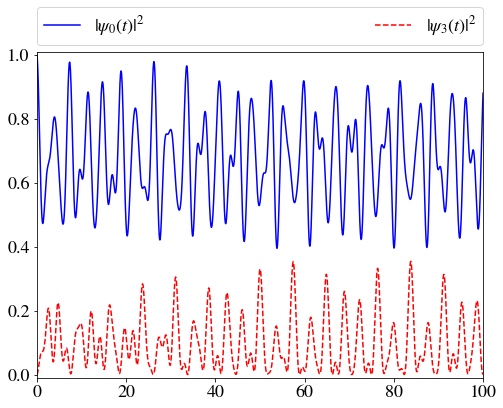

In [6]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)



plt.plot(times, List_fin(result.states,0),label='$|\psi_{0}(t)|^2 $',color='blue')
#plt.plot(times, List_fin(result.states,1),label='$|\psi_{1}(t)|^2 $')  #Does not activate for |0>
#plt.plot(times, List_fin(result.states,2),label='$|\psi_{2}(t)|^2 $')  #Does not activate for |0> 
plt.plot(times, List_fin(result.states,3),label='$|\psi_{3}(t)|^2 $',color='red',linestyle='--')
#plt.plot(times, List_fin(result.states,4),label='$|\psi_{4}(t)|^2$')  #Does not activate for |0>
#plt.plot(times, List_fin(result.states,5),label='$|\psi_{5}(t)|^2 $',color='green')  
#plt.plot(times, List_fin(result.states,6),label='$|\psi_{6}(t)|^2 $',color='orange')
#plt.plot(times, List_fin(result.states,7),label='$|\psi_{7}(t)|^2 $')  #Does not activate

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlim(-0.01,100.01)
plt.ylim(-0.01,1.01);

In [7]:
#Monte-Carlo Solver

resultmc = mcsolve(H, psi0, times, [], [])


def List_fin(array_states,i):
    List_first=[]
    for j in array_states:
        List_first.append(np.abs(complex(j[i]))**2)
    return List_first

No c_ops, using sesolve
10.0%. Run time:   0.22s. Est. time left: 00:00:00:01
20.0%. Run time:   0.41s. Est. time left: 00:00:00:01
30.0%. Run time:   0.56s. Est. time left: 00:00:00:01
40.0%. Run time:   0.80s. Est. time left: 00:00:00:01
50.0%. Run time:   1.13s. Est. time left: 00:00:00:01
60.0%. Run time:   1.24s. Est. time left: 00:00:00:00
70.0%. Run time:   1.51s. Est. time left: 00:00:00:00
80.0%. Run time:   1.63s. Est. time left: 00:00:00:00
90.0%. Run time:   1.77s. Est. time left: 00:00:00:00
Total run time:   1.90s


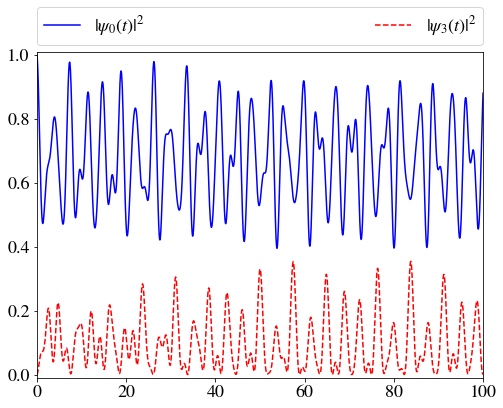

In [8]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)



plt.plot(times, List_fin(resultmc.states,0),label='$|\psi_{0}(t)|^2 $',color='blue')
#plt.plot(times, List_fin(result.states,1),label='$|\psi_{1}(t)|^2 $')  #Does not activate for |0>
#plt.plot(times, List_fin(result.states,2),label='$|\psi_{2}(t)|^2 $')  #Does not activate for |0> 
plt.plot(times, List_fin(resultmc.states,3),label='$|\psi_{3}(t)|^2 $',color='red',linestyle='--')
#plt.plot(times, List_fin(result.states,4),label='$|\psi_{4}(t)|^2$')  #Does not activate for |0>
#plt.plot(times, List_fin(result.states,5),label='$|\psi_{5}(t)|^2 $',color='green')  
#plt.plot(times, List_fin(result.states,6),label='$|\psi_{6}(t)|^2 $',color='orange')
#plt.plot(times, List_fin(result.states,7),label='$|\psi_{7}(t)|^2 $')  #Does not activate

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlim(-0.01,100.01)
plt.ylim(-0.01,1.01);

So far we had set the basic elements to get the unitary dynamics from our hamiltonian, up to parameters that can be set by the user. Now we will try to define the hamiltonian for a CNOT gate in order to simulate the generation of a GHZ state.

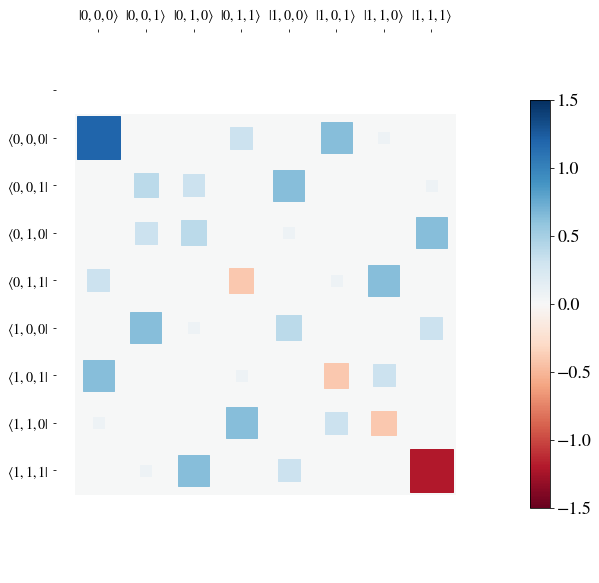

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
hinton(H, ax=ax);

## 2. Non-unitary evolution with constant collapsing operators

In [10]:
#ME solver only allowed to me until now (only checked me and mc) to use collapsing operators

bina=1  #A binary parameter to activate or deactivate the collapsing operator

c_ops1=bina*tensor(np.sqrt(0.5) * sigmax(),np.sqrt(0.5) * sigmax(),np.sqrt(0.5) * sigmax()) #Collapsing operator
times = np.linspace(0.0, 80.0, 5000)

psi0=basis(8,0)

resultme = mesolve(H, psi0, times, [c_ops1], [])


#resultme.states generates a "list" of density matrices
rhos=resultme.states

def proy_rho(Rho_ar,j):
    List_rho_proy=[]
    for i in Rho_ar:
        List_rho_proy.append(np.abs(i[j,j]))
    return List_rho_proy
    


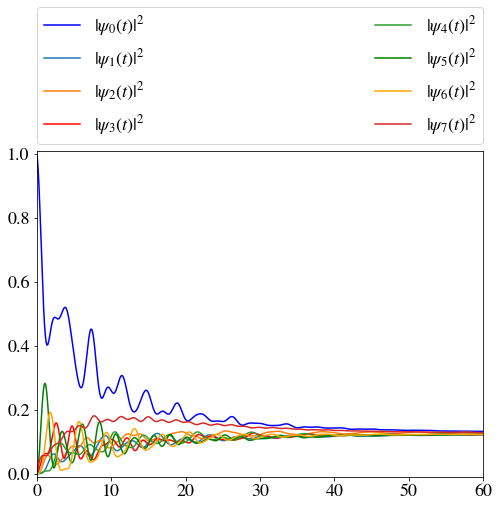

In [11]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)



plt.plot(times, proy_rho(rhos,0),label='$|\psi_{0}(t)|^2 $',color='blue')
plt.plot(times, proy_rho(rhos,1),label='$|\psi_{1}(t)|^2 $')  #Does not activate for |0>
plt.plot(times, proy_rho(rhos,2),label='$|\psi_{2}(t)|^2 $')  #Does not activate for |0> 
plt.plot(times, proy_rho(rhos,3),label='$|\psi_{3}(t)|^2 $',color='red')
plt.plot(times, proy_rho(rhos,4),label='$|\psi_{4}(t)|^2$')  #Does not activate for |0>
plt.plot(times, proy_rho(rhos,5),label='$|\psi_{5}(t)|^2 $',color='green')  
plt.plot(times, proy_rho(rhos,6),label='$|\psi_{6}(t)|^2 $',color='orange')
plt.plot(times, proy_rho(rhos,7),label='$|\psi_{7}(t)|^2 $')  #Does not activate

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlim(-0.01,60.01)
plt.ylim(-0.01,1.01);

Is it possible to reuse the last density matrix? Yes, so far the collapse operators are constant, then we can recicle the density matrix without having differences respect a system which is simulated using different partitions of time.

## 3. Time-dependent hamiltonian evolution

For achieving this we follow the format:

H = [H0, [H1, py_coeff1], [H2, py_coeff2], ...], 
c_ops = [[C0, py_coeff0], C1, [C2, py_coeff2], ...]

Also we can use the string format but for now we will focus on this form to describe the time-dependent part of the hamiltonian.